## CO2 Emissions Prediction Model
Testing what features are most important for predicting CO2 emissions of vehicles.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

In [4]:
df = pd.read_csv("data/co2_emissions.csv")
df.head()

,Model year,Make,Model,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,City,Highway,Combined,Combined (mpg),CO2 emissions
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258
3,2020,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261


Text(0.5, 1.0, 'Distribution for CO₂ emissions')

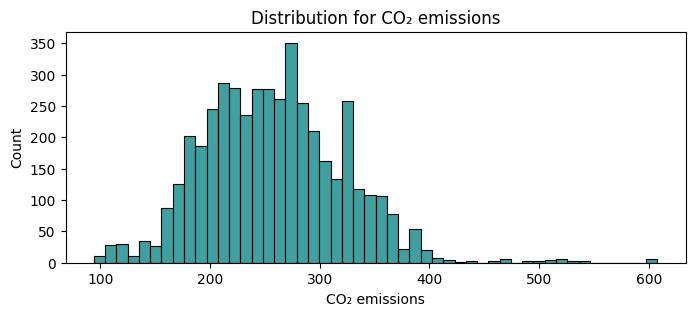

In [5]:
plt.figure(figsize=(8,3))
sns.histplot(df, x="CO2 emissions", color="teal")
plt.xlabel("CO₂ emissions")
plt.title("Distribution for CO₂ emissions")

In [6]:
df['Vehicle class'].unique()

array(['Compact', 'Sport utility vehicle: Small', 'Two-seater',
       'Mid-size', 'Minicompact', 'Subcompact', 'Station wagon: Small',
       'Station wagon: Mid-size', 'Full-size',
       'Sport utility vehicle: Standard', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle'], dtype=object)

In [7]:
df_compact = df[df["Vehicle class"] == "Compact"]

df_mid_size = df[df["Vehicle class"] == "Mid-size"]

test_results = stats.ttest_ind(df_compact["CO2 emissions"], df_mid_size["CO2 emissions"],
                              equal_var=True, alternative="less")


tstat = test_results[0]
pval = test_results[1]

In [8]:
print("The p-value is", pval, ", with a t-statistic of",round(tstat, 4))   

The p-value is 4.0886585050317336e-05 , with a t-statistic of -3.9566


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529 entries, 0 to 4528
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model year      4529 non-null   int64  
 1   Make            4529 non-null   object 
 2   Model           4529 non-null   object 
 3   Vehicle class   4529 non-null   object 
 4   Engine size     4529 non-null   float64
 5   Cylinders       4529 non-null   int64  
 6   Transmission    4529 non-null   object 
 7   Fuel type       4529 non-null   object 
 8   City            4529 non-null   float64
 9   Highway         4529 non-null   float64
 10  Combined        4529 non-null   float64
 11  Combined (mpg)  4529 non-null   int64  
 12  CO2 emissions   4529 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 460.1+ KB


<Figure size 640x480 with 0 Axes>

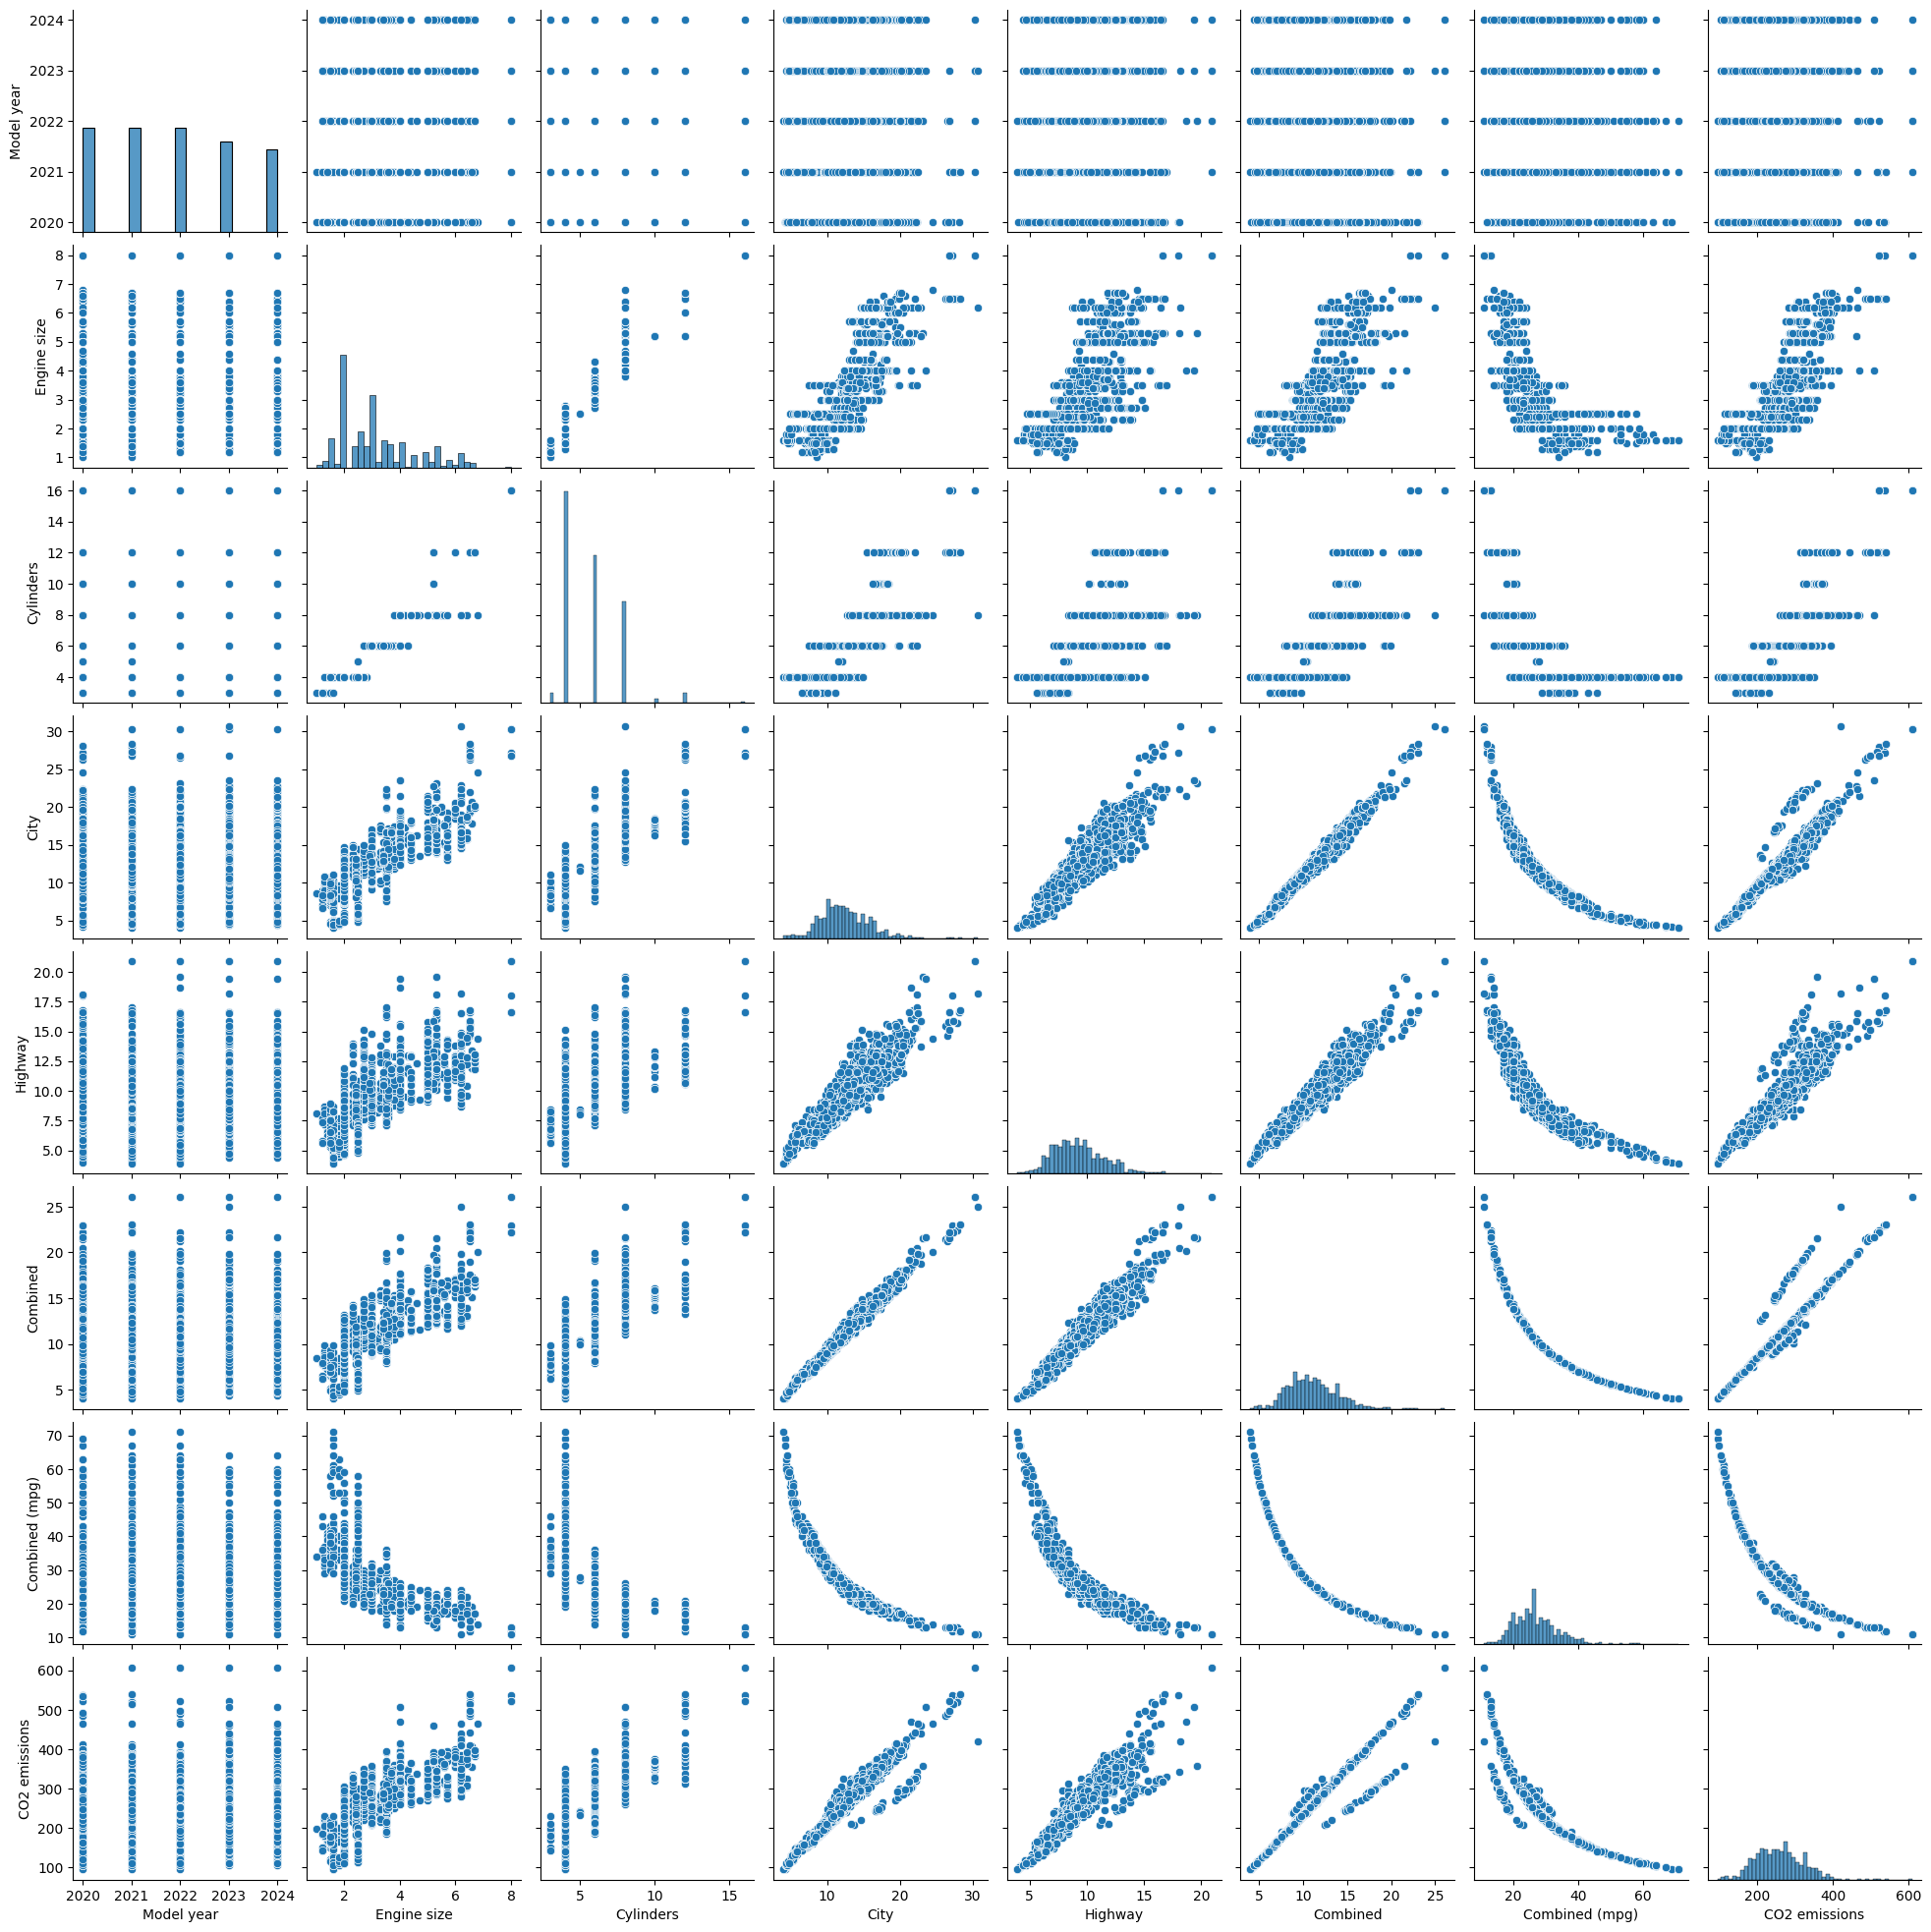

In [10]:
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns.to_list()
plt.figure() 

axes = sns.pairplot(df[numeric_features])
    
plt.show()

In [11]:
correlation_matrix = df[numeric_features].corr()

correlation_matrix

,Model year,Engine size,Cylinders,City,Highway,Combined,Combined (mpg),CO2 emissions
Model year,1.000000,-0.018811,-0.025161,-0.005381,0.037504,0.009871,-0.004164,0.016861
Engine size,-0.018811,1.000000,0.919458,0.828643,0.734967,0.810211,-0.701576,0.813010
Cylinders,-0.025161,0.919458,1.000000,0.835519,0.724491,0.811081,-0.691565,0.822607
City,-0.005381,0.828643,0.835519,1.000000,0.921315,0.990335,-0.910812,0.962699
Highway,0.037504,0.734967,0.724491,0.921315,1.000000,0.966060,-0.879067,0.931323
Combined,0.009871,0.810211,0.811081,0.990335,0.966060,1.000000,-0.916312,0.969235
Combined (mpg),-0.004164,-0.701576,-0.691565,-0.910812,-0.879067,-0.916312,1.000000,-0.914270
CO2 emissions,0.016861,0.813010,0.822607,0.962699,0.931323,0.969235,-0.914270,1.000000


In [12]:
X_simple = sm.add_constant(df["City"])
Y_simple = (df["CO2 emissions"])

model_simple = sm.OLS(Y_simple, X_simple)
results_simple = model_simple.fit()

print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.731e+04
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:44:04   Log-Likelihood:                -19341.
No. Observations:                4529   AIC:                         3.869e+04
Df Residuals:                    4527   BIC:                         3.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2213      0.963     37.609      0.0

In [13]:
predictors = ["City", "Fuel type"]

fuel_type_dummies = pd.get_dummies(df[predictors], columns=["Fuel type"], drop_first=True, dtype=int)

fuel_type_dummies.head()

,City,Fuel type_E,Fuel type_X,Fuel type_Z
0,9.9,0,0,1
1,12.3,0,0,1
2,12.2,0,0,1
3,9.1,0,0,1
4,11.1,0,0,1


In [14]:
X_multi = sm.add_constant(fuel_type_dummies)

Y_multi = df["CO2 emissions"]

model_multi = sm.OLS(Y_multi,X_multi)
results_multi = model_multi.fit()

print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.217e+04
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:44:04   Log-Likelihood:                -16537.
No. Observations:                4529   AIC:                         3.308e+04
Df Residuals:                    4524   BIC:                         3.312e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.3992      1.003     55.233      

In [15]:
test_df = pd.read_csv("data/test_cars.csv")
predictors = ["City", "Fuel type"]
fuel_type_dummies_test = pd.get_dummies(test_df[predictors], columns=["Fuel type"], dtype=int)
fuel_type_dummies_test = fuel_type_dummies_test.reindex(
    columns=fuel_type_dummies.columns, fill_value=0)

X_test_multi = sm.add_constant(fuel_type_dummies_test)

predictions_test_multi = results_multi.predict(X_test_multi)

In [16]:
print("\nPredictions using the selected model:")
for i in range(len(predictions_test_multi)):
    print(test_df["Model year"][i], test_df["Make"][i], test_df["Model"][i], ":", predictions_test_multi[i])


Predictions using the selected model:
2023 Kia Forte : 179.1705697440702
2024 Nissan Sentra : 163.77029861648086
2023 Honda Accord : 127.77216485574075
2024 Genesis G70 : 241.67789789377844
